# Exploring the Justification of Violence Against Women - A Visual Exploration

**Importing the data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
filename = "/content/drive/MyDrive/DSDojo/PandasForDataManipulation/20200306 Data International Women's Day Viz5 Launch.csv"
df = pd.read_csv(filename)

In [4]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [5]:
df[df['Value'].isna()]['Demographics Response'].unique()

array(['Never married', 'No education', 'Primary', '15-24', '25-34',
       '35-49', 'Higher', 'Secondary', 'Employed for cash',
       'Employed for kind', 'Unemployed', 'Married or living together',
       'Widowed, divorced, separated', 'Rural', 'Urban'], dtype=object)

In [6]:
df['Year'] = pd.DatetimeIndex(df['Survey Year']).year
df.drop(columns = 'Survey Year', inplace = True)
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Value,Year
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,NaN,2015
1,1,Afghanistan,F,Education,Higher,... if she burns the food,10.1,2015
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,13.7,2015
3,1,Afghanistan,F,Education,Primary,... if she burns the food,13.8,2015
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8,2015
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8,2015
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1,2015
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0,2015
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2,2015


In [7]:
FemaleAgree = df[df['Gender']=='F'].groupby(['Year'])['Value'].mean()
FemaleAgree['Yeartest'] =  FemaleAgree.index
FemaleAgree

Year
2000                                                    36.19
2001                                                  6.61889
2002                                                  46.1867
2003                                                  45.2133
2005                                                  10.5595
2006                                                  21.4606
2007                                                   1.5859
2008                                                  11.6542
2009                                                  7.98111
2010                                                  23.7944
2011                                                  24.1524
2012                                                  21.6279
2013                                                  24.8785
2014                                                  22.6174
2015                                                  19.4898
2016                                                  25.4583
201

**Visualizing the Data**

[None, None, None, None]

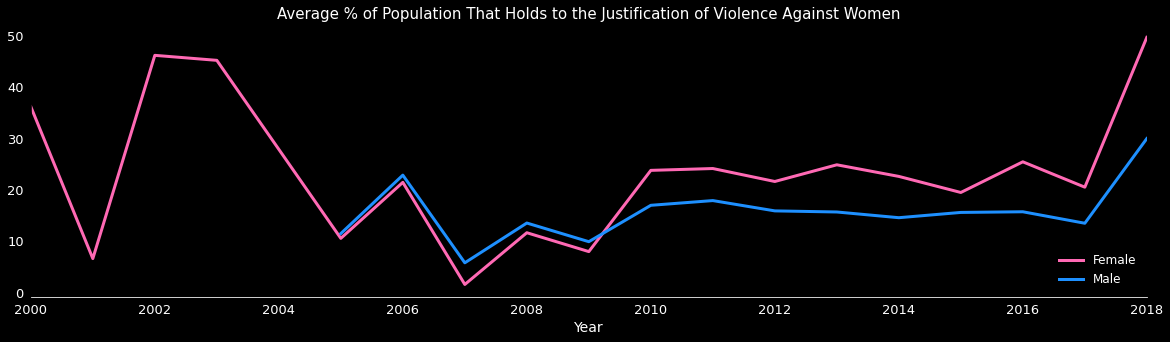

In [19]:
# lets first try visualize without handling nulls
#Average % of demographic groups that Agree That violence against women is justified, by sex
FemaleAgree = df[df['Gender']=='F'].groupby(['Year'])['Value'].mean()
MaleAgree = df[df['Gender']=='M'].groupby(['Year'])['Value'].mean()
#sns.set_theme()
#plt.style.use('dark_background')
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(20,5))
plt.xticks(fontsize = 13,c = 'w')
plt.yticks(fontsize = 13, c = 'w')
graphic = plt.gca()
fig.set_facecolor('k')
axes.set_facecolor('k')
plt.xlim(2000,2018)
plt.xlabel("Year",c = 'w', fontsize = 14)
axes.spines["bottom"].set_color('w')
axes.spines["right"].set_color('k')
axes.spines["top"].set_color('k')
#plt.ylabel("Demographic Percent",c = 'w')
plt.title("Average % of Population That Holds to the Justification of Violence Against Women",c = 'w', fontsize = 15)
axes.plot(FemaleAgree.index,FemaleAgree.values, label = 'Female', c= 'hotpink', linewidth = 3)
axes.plot(MaleAgree.index,MaleAgree.values, label = 'Male', c= 'dodgerblue', linewidth = 3)
legend = axes.legend(loc= "lower right", facecolor = "k", framealpha = 0, fontsize = 12)
axes.grid(False)
plt.setp(legend.get_texts(), color = 'w')
#plt.savefig('/content/drive/MyDrive/DSDojo/PandasForDataManipulation/results.png', dpi = 300)

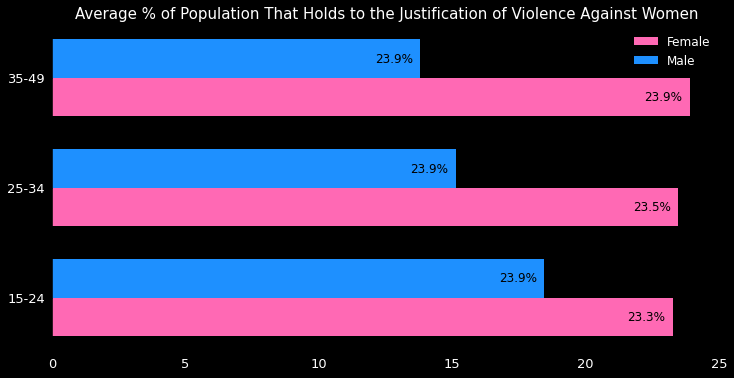

In [41]:
# lets first try visualize without handling nulls
#Average % of demographic that agree violence against women is justified, by sex and demographic

# N=5
# NOverall= 3
# widthOverall = 0.35
# ind = np.arange(N)
# FemaleAgreeOverall = df[(df['Gender']=='F')].groupby(['Demographics Question'])['Value'].mean()
# MaleAgreeOverall = df[(df['Gender']=='M')].groupby(['Demographics Question'])['Value'].mean()
# #figOverall, axAgreeOverall = plt.subplots(3,2, figsize = (12,6))
# figOverall, axAgreeOverall = plt.subplots(figsize = (12,6))
# axAgreeOverall.barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# axAgreeOverall.barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')
# axAgreeOverall.title("Average % of Population That Holds to the Justification of Violence Against Women",c = 'w', fontsize = 15)
# #plt.xticks(fontsize = 13,c = 'w')
# plt.yticks(fontsize = 13, c = 'w')
# axAgreeOverall.set_facecolor('k')
# figOverall.set_facecolor('k')
# plt.xlim(0,28)
# axAgreeOverall.spines["bottom"].set_color('k')
# axAgreeOverall.spines["right"].set_color('k')
# axAgreeOverall.spines["top"].set_color('k')
# # plt.barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# # plt.barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')
# xOverallList = tuple(FemaleAgreeOverall.index)
# plt.yticks(ind + widthOverall/2 ,xOverallList)
# for index, value in enumerate(FemaleAgreeOverall.values):
#     plt.text(value-1.7,index,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center')
# for index, value in enumerate(MaleAgreeOverall.values):
#     plt.text(value-1.7,index + widthOverall,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center')
# legend = axAgreeOverall.legend(loc= "upper right", facecolor = "k", framealpha = 0, fontsize = 12)
# plt.setp(legend.get_texts(), color = 'w')
# axAgreeOverall.grid(c='k')

Nage=3
#NAge= 3
widthOverall = 0.35
indAge = np.arange(Nage)
FemaleAgreeAge = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Age')].groupby(['Demographics Response'])['Value'].mean()
MaleAgreeAge = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Age')].groupby(['Demographics Response'])['Value'].mean()
FemaleAgreeAge
#figOverall, axAgreeOverall = plt.subplots(3,2, figsize = (12,6))
figOverall, axAgreeAge = plt.subplots(figsize = (12,6))
axAgreeAge.barh(indAge,FemaleAgreeAge.values,widthOverall, label = 'Female',color= 'hotpink')
axAgreeAge.barh(indAge + widthOverall ,MaleAgreeAge.values,widthOverall, label = 'Male', color= 'dodgerblue')
axAgreeAge.set_title("Average % of Population That Holds to the Justification of Violence Against Women",c = 'w', fontsize = 15)
plt.xticks(fontsize = 13,c = 'w')
axAgreeAge.set_facecolor('k')
figOverall.set_facecolor('k')
#plt.xlim(0,)
axAgreeAge.spines["bottom"].set_color('k')
axAgreeAge.spines["right"].set_color('k')
axAgreeAge.spines["top"].set_color('k')
xAgeList = tuple(FemaleAgreeAge.index)
plt.yticks(indAge + widthOverall/2 ,xAgeList,fontsize = 13, c = 'w')

for index, value in enumerate(FemaleAgreeAge.values):
    plt.text(value-1.7,index,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
for iindex, vvalue in enumerate(MaleAgreeAge.values):
    plt.text(vvalue-1.7,iindex + widthOverall,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center',fontsize = 12)
legend = axAgreeAge.legend(loc='upper right', facecolor = "k", framealpha = 0, fontsize = 12)
plt.setp(legend.get_texts(), color = 'w')
axAgreeAge.grid(False)
#plt.savefig('/content/drive/MyDrive/DSDojo/PandasForDataManipulation/subplt1.png', dpi = 300)

# #For Employment
# Nage=3
# #NAge= 3
# widthOverall = 0.35
# indAge = np.arange(Nage)
# FemaleAgreeEmp = df[(df['Gender']=='F') & (df['Demographics Question'] == 'Employment')].groupby(['Demographics Response'])['Value'].mean()
# MaleAgreeEmp = df[(df['Gender']=='M') & (df['Demographics Question'] == 'Employment')].groupby(['Demographics Response'])['Value'].mean()
# #figOverall, axAgreeOverall = plt.subplots(3,2, figsize = (12,6))
# #figOverall, axAgreeAge = plt.subplots(nrows = 1, ncols = 2,figsize = (12,6))
# axAgreeEmp[1].barh(indAge,FemaleAgreeEmp.values,widthOverall, label = 'Female',color= 'hotpink')
# axAgreeEmp[1].barh(indAge + widthOverall ,MaleAgreeEmp.values,widthOverall, label = 'Male', color= 'dodgerblue')
# #axAgreeAge.title("Average % of Population That Holds to the Justification of Violence Against Women",c = 'w', fontsize = 15)
# #plt.xticks(fontsize = 13,c = 'w')
# plt.yticks(fontsize = 13, c = 'w')
# axAgreeAge[1].set_facecolor('k')
# figOverall.set_facecolor('k')
# plt.xlim(0,30)
# axAgreeEmp[1].spines["bottom"].set_color('k')
# axAgreeEmp[1].spines["right"].set_color('k')
# axAgreeEmp[1].spines["top"].set_color('k')
# axAgreeEmp[1].spines["left"].set_color('k')
# xOverallList = tuple(FemaleAgreeEmp.index)
# plt.yticks(indAge + widthOverall/2 ,xOverallList)
# for index, value in enumerate(FemaleAgreeEmp.values):
#     plt.text(value-1.7,index,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center')
# for index, value in enumerate(MaleAgreeEmp.values):
#     plt.text(value-1.7,index + widthOverall,str(np.round(value,1))+'%',color = 'k', verticalalignment = 'center')
# legend = axAgreeEmp[1].legend(loc= "upper right", facecolor = "k", framealpha = 0, fontsize = 12)
# plt.setp(legend.get_texts(), color = 'w')
# axAgreeEmp[1].grid(False)


#Overall
# N=5
# NOverall= 3
# widthOverall = 0.35
# ind = np.arange(N)
# FemaleAgreeOverall = df[(df['Gender']=='F')].groupby(['Demographics Question'])['Value'].mean()
# MaleAgreeOverall = df[(df['Gender']=='M')].groupby(['Demographics Question'])['Value'].mean()
# figOverall, axAgreeOverall = plt.subplots(3,2, figsize = (12,6))
# axAgreeOverall[0].barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# axAgreeOverall[0].barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')

# # plt.xticks(fontsize = 13,c = 'w')
# # plt.yticks(fontsize = 13, c = 'w')
# # axAgreeOverall.set_facecolor('k')
# # plt.barh(ind,FemaleAgreeOverall.values,widthOverall, label = 'Female',color= 'hotpink')
# # plt.barh(ind + widthOverall ,MaleAgreeOverall.values,widthOverall, label = 'Male', color= 'dodgerblue')
# xOverallList = tuple(FemaleAgreeOverall.index)
# plt.yticks(ind + widthOverall/2 ,xOverallList)
# for index, value in enumerate(FemaleAgreeOverall.values):
#     plt.text(value,index,str(np.round(value,1)))



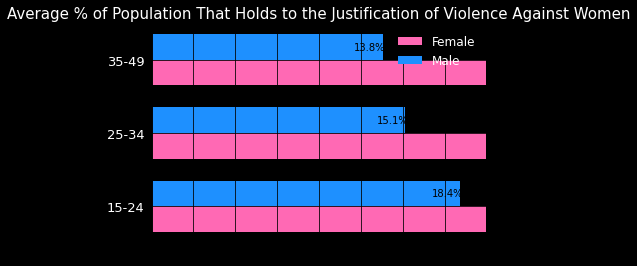

In [11]:
indAge

array([0, 1, 2])